<a href="https://colab.research.google.com/github/pranavgupta0001/yorkUCourses/blob/main/phys4060/phys4060_esse4020_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
frequencies = np.logspace(0, 4, num_sinusoids, base=2)

# Amplitudes (ratio of largest to smallest amplitude is at least 10)
amplitudes = np.linspace(1, 10, num_sinusoids)
np.random.shuffle(amplitudes)

# Phases
phases = np.random.uniform(0, 2*np.pi, num_sinusoids)

# Sampling interval delta, ∆
Tmin = 1 / frequencies[-1]  # period of the wave with the smallest period
delta = 0.5 * Tmin

# Time vector (slightly longer than the largest period)
Tmax = 1 / frequencies[0]  # period of the wave with the largest period
t = np.arange(0, Tmax + 5*delta, delta)

# Generate sinusoids
sinusoids = []
for i in range(num_sinusoids):
    sinusoid = amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i])
    sinusoids.append(sinusoid)

#add a linear trend and random noise to each series
# Linear trend
slope1 = 0.52
slope2 = -0.71
intercept1 = 25
intercept2 = 52
linear_trend1 = slope1 * t + intercept1
linear_trend2 = slope2 * t + intercept2

# Random noise (between the two smallest amplitudes)
noise_amplitude = (amplitudes[1] - amplitudes[0]) / 2
noise1 = np.random.uniform(-noise_amplitude, noise_amplitude, len(t))
noise2 = np.random.uniform(-noise_amplitude, noise_amplitude, len(t))

# Final seriers by Combining sinusoids, linear trend, and noise
series1 = sum(sinusoids)  + linear_trend1 + noise1
series2 = sum(sinusoids) + linear_trend2 + noise2

array([ 1.,  2.,  4.,  8., 16.])

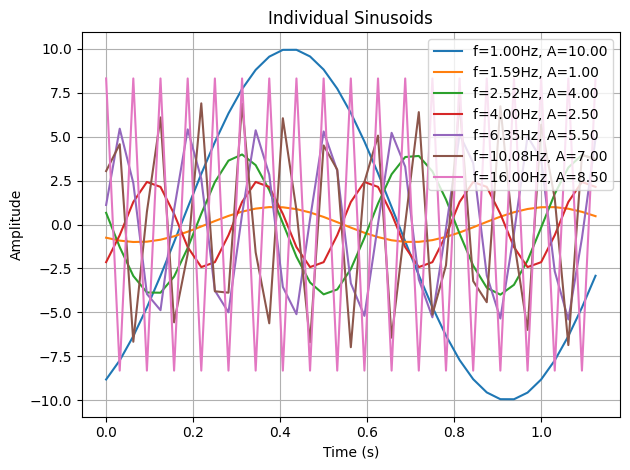

,Frequency (Hz),Amplitude,Phase (radians)
0,1.000000,10.0,5.201502
1,1.587401,1.0,3.991163
2,2.519842,4.0,2.974057
3,4.000000,2.5,5.252267
4,6.349604,5.5,0.203987
5,10.079368,7.0,0.449932
6,16.000000,8.5,1.365853


In [23]:
# Define sinusoid parameters
np.random.seed(52)

# Number of sinusoids
num_sinusoids = 7

# Frequencies (at least four octaves wide)
frequencies = np.logspace(0, 4, num_sinusoids, base=2)

# Amplitudes (ratio of largest to smallest amplitude is at least 10)
amplitudes = np.linspace(1, 10, num_sinusoids)
np.random.shuffle(amplitudes)

# Phases
phases = np.random.uniform(0, 2*np.pi, num_sinusoids)

# Sampling interval delta, ∆
Tmin = 1 / frequencies[-1]  # period of the wave with the smallest period
delta = 0.5 * Tmin

# Time vector (slightly longer than the largest period)
Tmax = 1 / frequencies[0]  # period of the wave with the largest period
t = np.arange(0, Tmax + 5*delta, delta)

# Generate sinusoids
sinusoids = []
for i in range(num_sinusoids):
    sinusoid = amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i])
    sinusoids.append(sinusoid)
    plt.plot(t, sinusoid, label=f'f={frequencies[i]:.2f}Hz, A={amplitudes[i]:.2f}')

plt.title('Individual Sinusoids')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Table with the characteristics of the waves
wave_characteristics = pd.DataFrame({
    'Frequency (Hz)': frequencies,
    'Amplitude': amplitudes,
    'Phase (radians)': phases
})
wave_characteristics

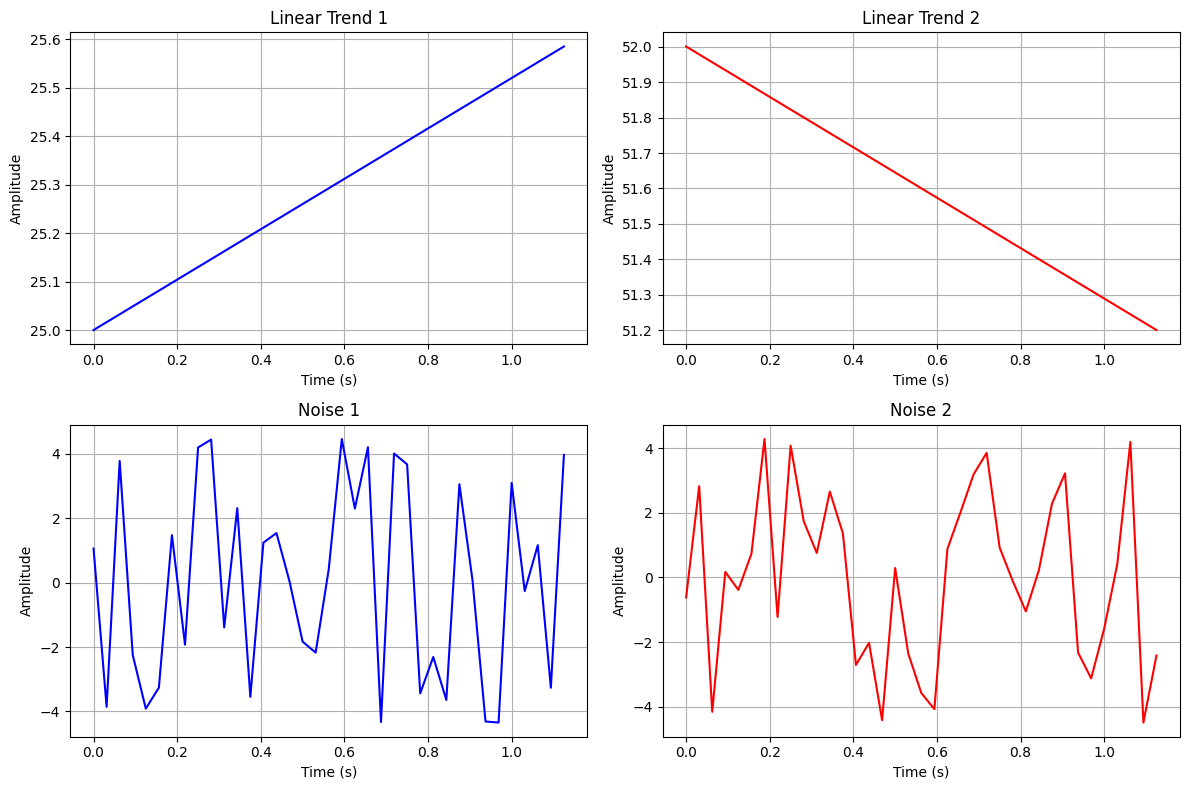

In [32]:
#add a linear trend and random noise to each series
# Linear trend
slope1 = 0.52
slope2 = -0.71
intercept1 = 25
intercept2 = 52
linear_trend1 = slope1 * t + intercept1
linear_trend2 = slope2 * t + intercept2

# Random noise (between the two smallest amplitudes)
noise_amplitude = (amplitudes[1] - amplitudes[0]) / 2
noise1 = np.random.uniform(-noise_amplitude, noise_amplitude, len(t))
noise2 = np.random.uniform(-noise_amplitude, noise_amplitude, len(t))

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t, linear_trend1, label='Linear Trend 1', color='blue')
plt.title('Linear Trend 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t, linear_trend2, label='Linear Trend 2', color='red')
plt.title('Linear Trend 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(t, noise1, label='Noise 1', color='blue')
plt.title('Noise 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(t, noise2, label='Noise 2', color='red')
plt.title('Noise 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

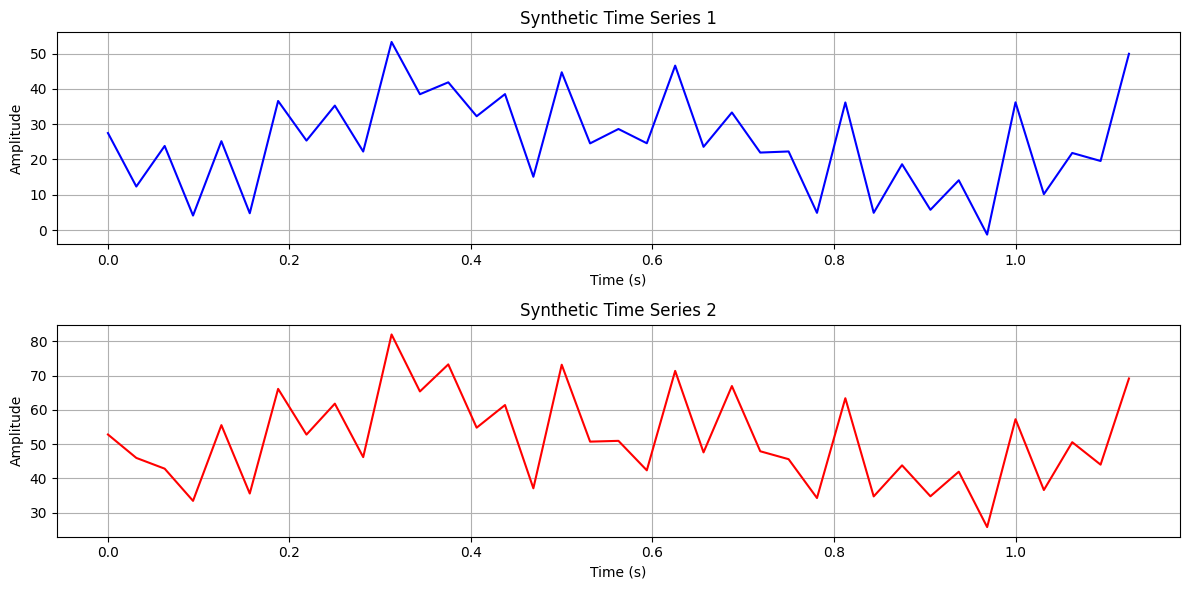

In [33]:
# Combine sinusoids, linear trend, and noise
series1 = sum(sinusoids)  + linear_trend1 + noise1
series2 = sum(sinusoids) + linear_trend2 + noise2

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, series1, label='Series 1', color='blue')
plt.title('Synthetic Time Series 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, series2, label='Series 2', color='red')
plt.title('Synthetic Time Series 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [17]:
#own code to calculate:
def calculate_mean(data):
    return sum(data) / len(data)

def calculate_variance(data):
    mean_value = calculate_mean(data)
    return sum([(x - mean_value)**2 for x in data]) / len(data)

def autocovariance(data, lag=0):
    n = len(data)
    mean = np.mean(data)
    return np.sum((data[:-lag or None] - mean) * (data[lag:] - mean)) / n

def autocorrelation(data, lag=0):
    return autocovariance(data, lag) / autocovariance(data, 0)


def crosscovariance(data1, data2, lag=0):
    n = len(data1)
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    return np.sum((data1[:-lag or None] - mean1) * (data2[lag:] - mean2)) / n

def crosscorrelation(data1, data2, lag=0):
    return crosscovariance(data1, data2, lag) / (np.std(data1) * np.std(data2))

In [31]:
lags

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

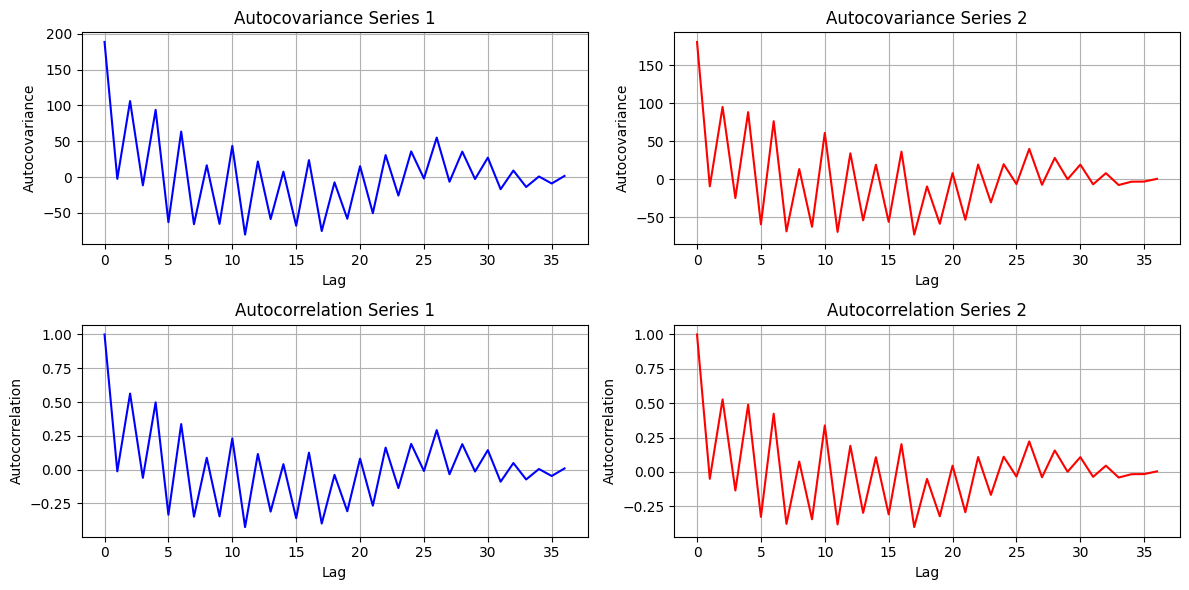

,Metric,Series 1,Series 2
0,Mean,25.063183,51.345835
1,Variance,188.642032,180.368996
2,Quadratic Norm,30221.791033,104220.259059
3,Power,816.805163,2816.763758


In [34]:
# Mean and variance
mean1, mean2 = calculate_mean(series1), calculate_mean(series2)
variance1, variance2 = calculate_variance(series1), calculate_variance(series2)

# Quadratic norm and power
quadratic_norm1, quadratic_norm2 = np.sum(series1**2), np.sum(series2**2)
power1, power2 = quadratic_norm1 / len(series1), quadratic_norm2 / len(series2)

# Auto-covariance and autocorrelation
lags = np.arange(0, len(t))
autocov1 = [autocovariance(series1, lag) for lag in lags]
autocov2 = [autocovariance(series2, lag) for lag in lags]
autocorr1 = [autocorrelation(series1, lag) for lag in lags]
autocorr2 = [autocorrelation(series2, lag) for lag in lags]

# Results
results = pd.DataFrame({
    'Metric': ['Mean', 'Variance', 'Quadratic Norm', 'Power'],
    'Series 1': [mean1, variance1, quadratic_norm1, power1],
    'Series 2': [mean2, variance2, quadratic_norm2, power2]
})

# Plotting autocovariance and autocorrelation
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(lags, autocov1, label='Autocovariance Series 1', color='blue')
plt.title('Autocovariance Series 1')
plt.xlabel('Lag')
plt.ylabel('Autocovariance')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(lags, autocov2, label='Autocovariance Series 2', color='red')
plt.title('Autocovariance Series 2')
plt.xlabel('Lag')
plt.ylabel('Autocovariance')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(lags, autocorr1, label='Autocorrelation Series 1', color='blue')
plt.title('Autocorrelation Series 1')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(lags, autocorr2, label='Autocorrelation Series 2', color='red')
plt.title('Autocorrelation Series 2')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.tight_layout()
plt.show()

results

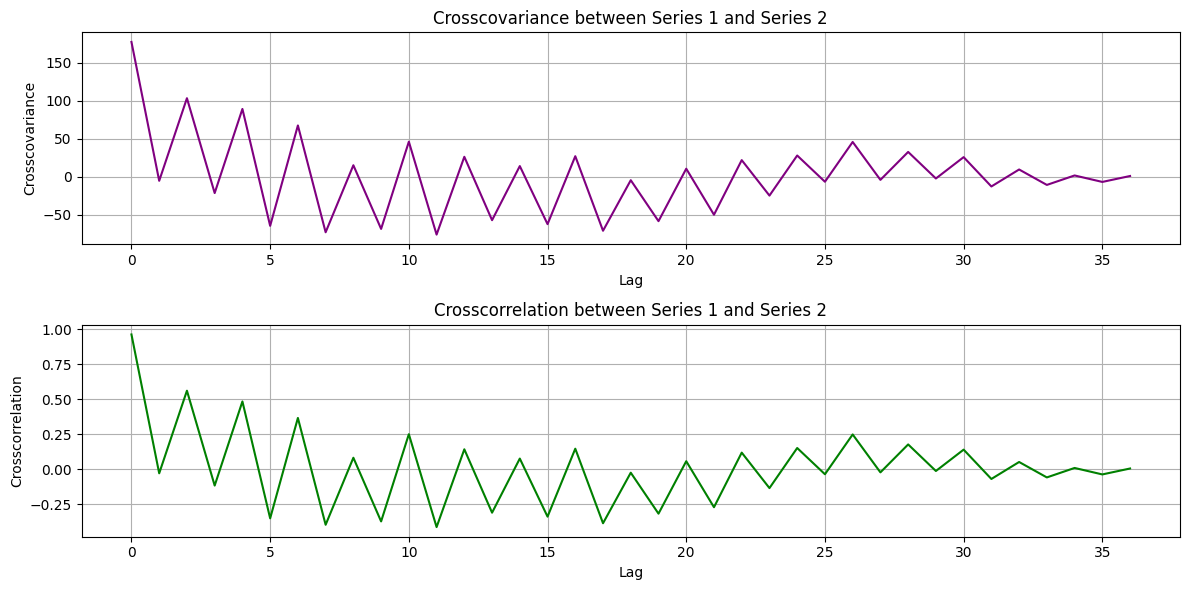

In [19]:
# Cross-covariance and crosscorrelation
crosscov = [crosscovariance(series1, series2, lag) for lag in lags]
crosscorr = [crosscorrelation(series1, series2, lag) for lag in lags]

# Plotting crosscovariance and crosscorrelation
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(lags, crosscov, label='Crosscovariance', color='purple')
plt.title('Crosscovariance between Series 1 and Series 2')
plt.xlabel('Lag')
plt.ylabel('Crosscovariance')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(lags, crosscorr, label='Crosscorrelation', color='green')
plt.title('Crosscorrelation between Series 1 and Series 2')
plt.xlabel('Lag')
plt.ylabel('Crosscorrelation')
plt.grid(True)

plt.tight_layout()
plt.show()

In [35]:
# Double the length of both series
t_extended = np.arange(0, 2*Tmax + 10*delta, delta)

# Generate extended sinusoids
sinusoids_extended = []
for i in range(num_sinusoids):
    sinusoid = amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t_extended + phases[i])
    sinusoids_extended.append(sinusoid)

# Linear trend and noise for extended series
linear_trend1_extended = slope1 * t_extended + intercept1
linear_trend2_extended = slope2 * t_extended + intercept2
noise1_extended = np.random.uniform(-noise_amplitude, noise_amplitude, len(t_extended))
noise2_extended = np.random.uniform(-noise_amplitude, noise_amplitude, len(t_extended))

# Combine sinusoids, linear trend, and noise for extended series
series1_extended = sum(sinusoids_extended) + linear_trend1_extended + noise1_extended
series2_extended = sum(sinusoids_extended) + linear_trend2_extended + noise2_extended

# Mean and variance for extended series
mean1_extended, mean2_extended = np.mean(series1_extended), np.mean(series2_extended)
variance1_extended, variance2_extended = np.var(series1_extended), np.var(series2_extended)

# Quadratic norm and power for extended series
quadratic_norm1_extended, quadratic_norm2_extended = np.sum(series1_extended**2), np.sum(series2_extended**2)
power1_extended, power2_extended = quadratic_norm1_extended / len(series1_extended), quadratic_norm2_extended / len(series2_extended)

# Results for extended series
results_extended = pd.DataFrame({
    'Metric': ['Mean', 'Variance', 'Quadratic Norm', 'Power'],
    'Extended Series 1': [mean1_extended, variance1_extended, quadratic_norm1_extended, power1_extended],
    'Extended Series 2': [mean2_extended, variance2_extended, quadratic_norm2_extended, power2_extended]
})

results_extended

,Metric,Extended Series 1,Extended Series 2
0,Mean,25.436281,50.898521
1,Variance,160.228302,162.244377
2,Quadratic Norm,59735.219287,203714.879267
3,Power,807.232693,2752.903774


In [37]:
# Reproduce Series 1 without the trend
series1_no_trend = series1 - linear_trend1

# 1. Mean and variance of the series without trend
mean_series1_no_trend = np.mean(series1_no_trend)
variance_series1_no_trend = np.var(series1_no_trend)

# 2. Quadratic norm and power of the series without trend
quadratic_norm_series1_no_trend = np.linalg.norm(series1_no_trend)**2
power_series1_no_trend = quadratic_norm_series1_no_trend / len(series1_no_trend)

# Results for series without trend
results_no_trend = pd.DataFrame({
    'Metric': ['Mean', 'Variance', 'Quadratic Norm', 'Power'],
    'Series 1 (No Trend)': [mean_series1_no_trend, variance_series1_no_trend, quadratic_norm_series1_no_trend, power_series1_no_trend]
})
results_no_trend

,Metric,Series 1 (No Trend)
0,Mean,-0.229317
1,Variance,189.268526
2,Quadratic Norm,7004.881158
3,Power,189.321112


In [36]:
results

,Metric,Series 1,Series 2
0,Mean,25.063183,51.345835
1,Variance,188.642032,180.368996
2,Quadratic Norm,30221.791033,104220.259059
3,Power,816.805163,2816.763758
